In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv("Diamonds.csv")
df.head()

,carat,clarity,price
0,0.23,SI2,326
1,0.21,SI1,326
2,0.23,VS1,327
3,0.29,VS2,334
4,0.31,SI2,335


In [167]:
df.shape

(53940, 3)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   clarity  53940 non-null  object 
 2   price    53940 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [169]:
df.isnull().sum()

carat      0
clarity    0
price      0
dtype: int64

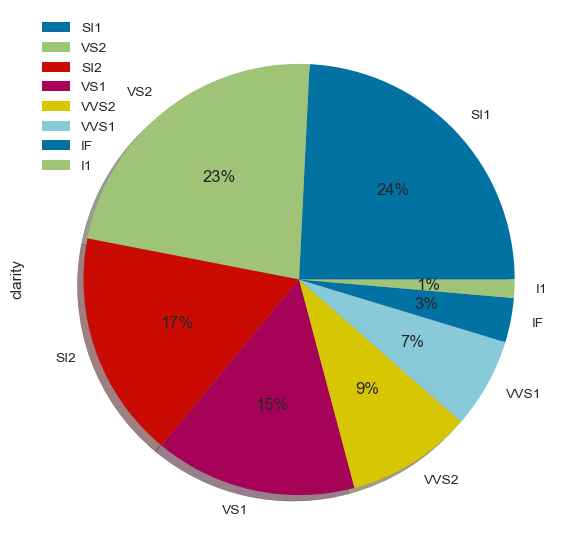

In [170]:
df.clarity.value_counts().plot.pie(autopct="%0.0f%%", shadow=True, legend=True, figsize=(7, 7));

In [171]:
df["clarity"] = df["clarity"].astype("category").cat.codes
df.head()

,carat,clarity,price
0,0.23,3,326
1,0.21,2,326
2,0.23,4,327
3,0.29,5,334
4,0.31,3,335


In [172]:
set(df["clarity"])

{0, 1, 2, 3, 4, 5, 6, 7}

In [173]:
df.dtypes

carat      float64
clarity       int8
price        int64
dtype: object

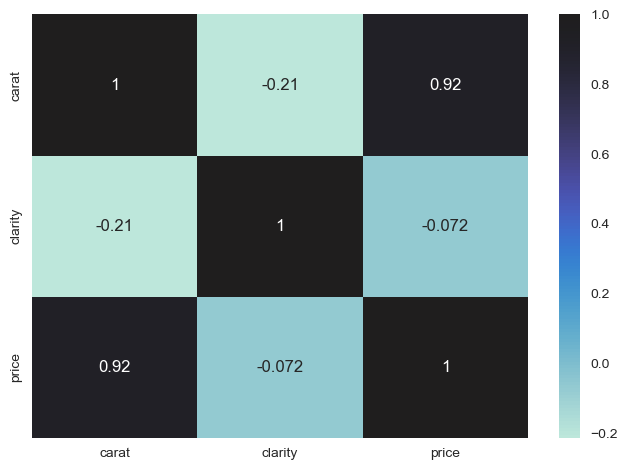

In [174]:
sns.heatmap(df.corr(), annot=True, center=True);

In [175]:
X = df.drop("price", axis=1)
y = df["price"]

X.shape, y.shape

((53940, 2), (53940,))

In [176]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 2), (10788, 2), (43152,), (10788,))

In [178]:
model = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), HistGradientBoostingRegressor(random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=42))])

In [179]:
model.score(X_test, y_test)

0.9373020840350311

In [180]:
model.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('polynomialfeatures', PolynomialFeatures()),
  ('histgradientboostingregressor',
   HistGradientBoostingRegressor(random_state=42))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'polynomialfeatures': PolynomialFeatures(),
 'histgradientboostingregressor': HistGradientBoostingRegressor(random_state=42),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'histgradientboostingregressor__categorical_features': None,
 'histgradientboostingregressor__early_stopping': 'auto',
 'histgradientboostingregressor__interaction_cst': None,
 'histgradientboostingregressor__l2_regularization': 0.0,
 'histgradientboostingregressor__learning_rate': 0.1,
 'histgradientboostingregressor__loss': 'squared_error',
 'histgradientboo

In [181]:
params = { 'minmaxscaler__clip':[True, False],
           'minmaxscaler__copy':[True, False],
           'polynomialfeatures__include_bias':[True, False],
           'polynomialfeatures__interaction_only':[True, False],
           'histgradientboostingregressor__warm_start':[True, False]
         }

grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('histgradientboostingregressor',
                                        HistGradientBoostingRegressor(random_state=42))]),
             param_grid={'histgradientboostingregressor__warm_start': [True,
                                                                       False],
                         'minmaxscaler__clip': [True, False],
                         'minmaxscaler__copy': [True, False],
                         'polynomialfeatures__include_bias': [True, False],
                         'polynomialfeatures__interaction_only': [True, False]})

In [182]:
grid.best_params_

{'histgradientboostingregressor__warm_start': True,
 'minmaxscaler__clip': True,
 'minmaxscaler__copy': True,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': True}

In [183]:
grid.best_score_

0.9375929232517402

In [184]:
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import GridSearchCV

In [ ]:
viz = PredictionError(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

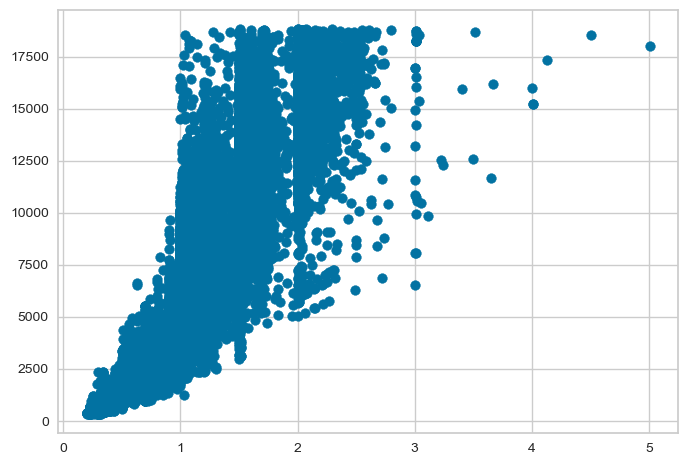

In [71]:
plt.scatter(x=df["carat"], y=df["price"]);

In [72]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(df)

y_predictions = km.predict(df)
set(y_predictions)

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0, 1, 2}

In [75]:
df["clusters"] = y_predictions
df

,carat,clarity,price,clusters
0,0.23,3,326,0
1,0.21,2,326,0
2,0.23,4,327,0
3,0.29,5,334,0
4,0.31,3,335,0
...,...,...,...,...
53935,0.72,2,2757,0
53936,0.72,2,2757,0
53937,0.70,2,2757,0
53938,0.86,3,2757,0


In [42]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]

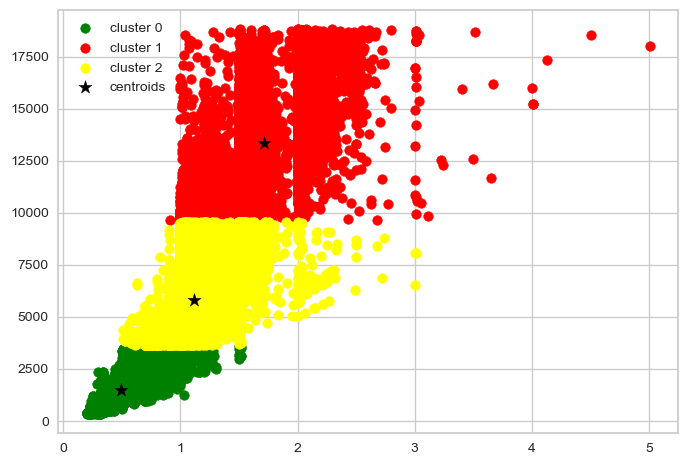

In [43]:
plt.scatter(x=df0["carat"], y=df0["price"], c="green", label="cluster 0");
plt.scatter(x=df1["carat"], y=df1["price"], c="red", label="cluster 1");
plt.scatter(x=df2["carat"], y=df2["price"], c="yellow", label="cluster 2");

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 2], s=100, marker="*", label="centroids", color="black");

plt.legend();

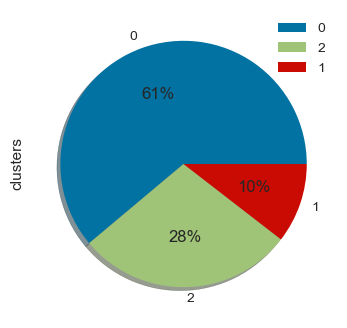

In [78]:
df.clusters.value_counts().plot.pie(autopct="%0.0f%%", shadow=True, legend=True, figsize=(5, 4));

In [80]:
label = km.labels_
data = df.drop("clusters", axis=1)
silhouette_score(data, label)

0.660259227145746

In [81]:
davies_bouldin_score(data, label)

0.48114269718979735

In [82]:
km.n_features_in_

3

In [83]:
km.feature_names_in_

array(['carat', 'clarity', 'price'], dtype=object)